# Week 7 Group Assignment 3

For this week's group assignment we trimmed the 2017 and 2011 GCRO Quality of Life datasets to only include information we will consider for our final project; decided on the information to keep from previous notebooks; and reframed our project to include BRT and rail lines as part of the public transportation component.

## Import necessary libraries

In [1]:
# to manipulate data
import pandas as pd

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## Import Data

In [2]:
qol_2017 = gpd.read_file('qol_wards_2017_clean.geojson')

In [3]:
qol_2011 = gpd.read_file('qol_wards_2011_clean.geojson')

In [4]:
local_munic_11 = gpd.read_file('MDB_Local_Municipal_Boundary_2011.geojson')

In [5]:
local_munic_17 = gpd.read_file('MDB_Local_Municipal_Boundary_2016G.geojson')

In [6]:
qol_2017.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 24889 entries, 0 to 24888
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   WardID                         24889 non-null  int64   
 1   LocalMunicipalityName          24889 non-null  object  
 2   DistrictMunicipalityName       24889 non-null  object  
 3   Shape__Area                    24889 non-null  float64 
 4   Shape__Length                  24889 non-null  float64 
 5   A1_Pop_group                   24889 non-null  object  
 6   A2_Sex                         24889 non-null  object  
 7   Q5_01_frequent_trip            24889 non-null  object  
 8   Q5_06_1_Walk                   23924 non-null  object  
 9   Q5_06_2_Bike                   23924 non-null  object  
 10  Q5_06_3_Motorbike              23924 non-null  object  
 11  Q5_06_4_Car_driver             23924 non-null  object  
 12  Q5_06_5_Car_passenger   

In [7]:
qol_2011.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 16730 entries, 0 to 16729
Data columns (total 34 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   WardID                                        16730 non-null  int64   
 1   LocalMunicipalityName                         16730 non-null  object  
 2   DistrictMunicipalityName                      16730 non-null  object  
 3   Shape__Area                                   16730 non-null  float64 
 4   Shape__Length                                 16730 non-null  float64 
 5   A1_Pop_Group                                  16729 non-null  float64 
 6   A2_Sex                                        16729 non-null  float64 
 7   A_4_1_Frequent_trip_purpose                   16561 non-null  float64 
 8   Q4_5 Walk_Frequent_Trip_Transp                2923 non-null   float64 
 9   Q4_5 Bike_Frequent_Trip_Transp            

In [8]:
local_munic_11.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   OBJECTID                  10 non-null     int64   
 1   ProvinceCode              10 non-null     object  
 2   ProvinceName              10 non-null     object  
 3   LocalMunicipalityCode     10 non-null     object  
 4   LocalMunicipalityName     10 non-null     object  
 5   DistrictMunicipalityCode  10 non-null     object  
 6   DistrictMunicipalityName  10 non-null     object  
 7   Year                      10 non-null     int64   
 8   Shape__Area               10 non-null     float64 
 9   Shape__Length             10 non-null     float64 
 10  geometry                  10 non-null     geometry
dtypes: float64(2), geometry(1), int64(2), object(6)
memory usage: 1008.0+ bytes


In [9]:
local_munic_17.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   OBJECTID                  9 non-null      int64   
 1   ProvinceCode              9 non-null      object  
 2   ProvinceName              9 non-null      object  
 3   LocalMunicipalityCode     9 non-null      object  
 4   LocalMunicipalityName     9 non-null      object  
 5   DistrictMunicipalityCode  9 non-null      object  
 6   DistrictMunicipalityName  9 non-null      object  
 7   Year                      9 non-null      int64   
 8   Shape__Area               9 non-null      float64 
 9   Shape__Length             9 non-null      float64 
 10  geometry                  9 non-null      geometry
dtypes: float64(2), geometry(1), int64(2), object(6)
memory usage: 920.0+ bytes


## Background Info on Gauteng

For our final project we think it is helpful to provide some general information about the Gauteng province and thus will create simple charts to share information about the region

### Population Groups in Gauteng

In [10]:
A1_pop_group_2011 = qol_2011.value_counts('A1_Pop_Group_recode').reset_index(name='count')

A1_pop_group_2011

,A1_Pop_Group_recode,count
0,African,13338
1,White,2328
2,Coloured,572
3,Asian/Indian,491


In [11]:
A1_pop_group_2017 = qol_2017.value_counts('A1_Pop_group').reset_index(name='count')

A1_pop_group_2017

,A1_Pop_group,count
0,African,20964
1,White,2578
2,Coloured,892
3,Indian/Asian,370
4,Other,85


Text(0.5, 1.0, 'Population Groups in Gauteng, 2017')

<Figure size 432x288 with 0 Axes>

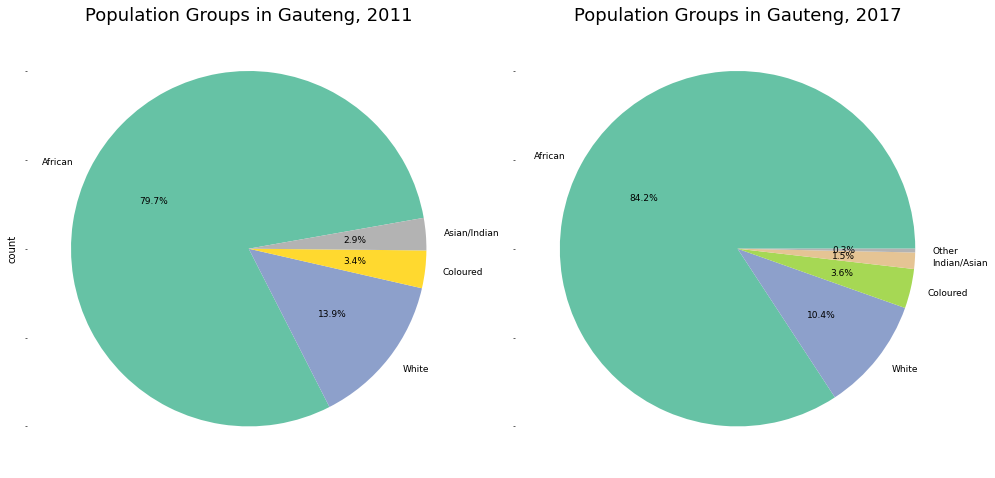

In [12]:
plt.figure(1)
# Create first chart here.

# create the 1x2 subplots
# set sharex and sharey to true to scale each map equally
fig, axs = plt.subplots(1, 2, figsize=(14, 12), sharex=True, sharey=True)

# name each subplot
ax1, ax2 = axs

A1_pop_group_2011.plot(kind='pie', y = 'count', ax=ax1, autopct = '%1.1f%%',
                     startangle=10,
             shadow=False,
             cmap='Set2',
             labels=A1_pop_group_2011['A1_Pop_Group_recode'],
             legend=False, fontsize=9)
ax1.set_title("Population Groups in Gauteng, 2011", fontsize = 18)

A1_pop_group_2017.plot(kind='pie', y = 'count', ax=ax2, autopct = '%1.1f%%',
                     startangle=0,
             shadow=False,
             cmap='Set2',
             labels=A1_pop_group_2017['A1_Pop_group'],
             legend=False, fontsize=9)
fig.tight_layout()

ax2.set_title("Population Groups in Gauteng, 2017", fontsize = 18)

By creating these two pie charts, we can easily see the population breakdown in Gauteng in 2011 and 2017

### African Population in each ward

#### 2011

In [13]:
pop_group_ward_11 = pd.crosstab(index=qol_2011['WardID'],
                        columns=qol_2011['A1_Pop_Group_recode'],
                       margins=True,
                       margins_name='Total Number')

pop_group_ward_11

A1_Pop_Group_recode,African,Asian/Indian,Coloured,White,Total Number
WardID,,,,,
74201001,3,1,1,16,21
74201002,27,0,0,0,27
74201003,13,0,1,8,22
74201004,11,0,0,16,27
74201005,7,2,1,16,26
...,...,...,...,...,...
79900102,39,0,0,1,40
79900103,67,0,0,1,68
79900104,3,0,0,1,4


In [14]:
# create new columns and populate it with normalized data

pop_group_ward_11['Percent African'] = pop_group_ward_11['African']/pop_group_ward_11['Total Number']*100

pop_group_ward_11

A1_Pop_Group_recode,African,Asian/Indian,Coloured,White,Total Number,Percent African
WardID,,,,,,
74201001,3,1,1,16,21,14.285714
74201002,27,0,0,0,27,100.000000
74201003,13,0,1,8,22,59.090909
74201004,11,0,0,16,27,40.740741
74201005,7,2,1,16,26,26.923077
...,...,...,...,...,...,...
79900102,39,0,0,1,40,97.500000
79900103,67,0,0,1,68,98.529412
79900104,3,0,0,1,4,75.000000


In [15]:
pop_group_ward_11.drop(['Total Number'])

A1_Pop_Group_recode,African,Asian/Indian,Coloured,White,Total Number,Percent African
WardID,,,,,,
74201001,3,1,1,16,21,14.285714
74201002,27,0,0,0,27,100.000000
74201003,13,0,1,8,22,59.090909
74201004,11,0,0,16,27,40.740741
74201005,7,2,1,16,26,26.923077
...,...,...,...,...,...,...
79900101,2,0,0,3,5,40.000000
79900102,39,0,0,1,40,97.500000
79900103,67,0,0,1,68,98.529412


In [16]:
#Merge this new dataframe with wards so I can map it

qol_2011= qol_2011.merge(pop_group_ward_11, on='WardID')

qol_2011.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 16729 entries, 0 to 16728
Data columns (total 40 columns):
 #   Column                                        Non-Null Count  Dtype   
---  ------                                        --------------  -----   
 0   WardID                                        16729 non-null  object  
 1   LocalMunicipalityName                         16729 non-null  object  
 2   DistrictMunicipalityName                      16729 non-null  object  
 3   Shape__Area                                   16729 non-null  float64 
 4   Shape__Length                                 16729 non-null  float64 
 5   A1_Pop_Group                                  16729 non-null  float64 
 6   A2_Sex                                        16729 non-null  float64 
 7   A_4_1_Frequent_trip_purpose                   16561 non-null  float64 
 8   Q4_5 Walk_Frequent_Trip_Transp                2923 non-null   float64 
 9   Q4_5 Bike_Frequent_Trip_Transp            

#### 2017

In [17]:
pop_group_ward_17 = pd.crosstab(index=qol_2017['WardID'],
                        columns=qol_2017['A1_Pop_group'],
                       margins=True,
                       margins_name='Total Number')

pop_group_ward_17

A1_Pop_group,African,Coloured,Indian/Asian,Other,White,Total Number
WardID,,,,,,
74201001,11,2,0,0,23,36
74201002,36,1,0,0,0,37
74201003,28,2,0,0,4,34
74201004,24,0,0,0,10,34
74201005,13,1,0,0,17,31
...,...,...,...,...,...,...
79900104,36,1,0,0,0,37
79900105,27,1,0,0,3,31
79900106,37,0,0,1,0,38


In [18]:
# create new columns and populate it with normalized data

pop_group_ward_17['Percent African'] = pop_group_ward_17['African']/pop_group_ward_17['Total Number']*100

pop_group_ward_17

A1_Pop_group,African,Coloured,Indian/Asian,Other,White,Total Number,Percent African
WardID,,,,,,,
74201001,11,2,0,0,23,36,30.555556
74201002,36,1,0,0,0,37,97.297297
74201003,28,2,0,0,4,34,82.352941
74201004,24,0,0,0,10,34,70.588235
74201005,13,1,0,0,17,31,41.935484
...,...,...,...,...,...,...,...
79900104,36,1,0,0,0,37,97.297297
79900105,27,1,0,0,3,31,87.096774
79900106,37,0,0,1,0,38,97.368421


In [19]:
pop_group_ward_17.drop(['Total Number'])

A1_Pop_group,African,Coloured,Indian/Asian,Other,White,Total Number,Percent African
WardID,,,,,,,
74201001,11,2,0,0,23,36,30.555556
74201002,36,1,0,0,0,37,97.297297
74201003,28,2,0,0,4,34,82.352941
74201004,24,0,0,0,10,34,70.588235
74201005,13,1,0,0,17,31,41.935484
...,...,...,...,...,...,...,...
79900103,36,0,0,0,0,36,100.000000
79900104,36,1,0,0,0,37,97.297297
79900105,27,1,0,0,3,31,87.096774


In [20]:
#Merge this new dataframe with wards so I can map it

qol_2017= qol_2017.merge(pop_group_ward_17, on='WardID')

qol_2017.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 24889 entries, 0 to 24888
Data columns (total 39 columns):
 #   Column                         Non-Null Count  Dtype   
---  ------                         --------------  -----   
 0   WardID                         24889 non-null  object  
 1   LocalMunicipalityName          24889 non-null  object  
 2   DistrictMunicipalityName       24889 non-null  object  
 3   Shape__Area                    24889 non-null  float64 
 4   Shape__Length                  24889 non-null  float64 
 5   A1_Pop_group                   24889 non-null  object  
 6   A2_Sex                         24889 non-null  object  
 7   Q5_01_frequent_trip            24889 non-null  object  
 8   Q5_06_1_Walk                   23924 non-null  object  
 9   Q5_06_2_Bike                   23924 non-null  object  
 10  Q5_06_3_Motorbike              23924 non-null  object  
 11  Q5_06_4_Car_driver             23924 non-null  object  
 12  Q5_06_5_Car_passenger   

Now that I have normalized my data and added the percentage of each ward that identify as African, I will map it with the district outlines to provide more context. 

### Mapping

Text(0.5, 1.0, 'Percent of Africans in each Ward, 2017')

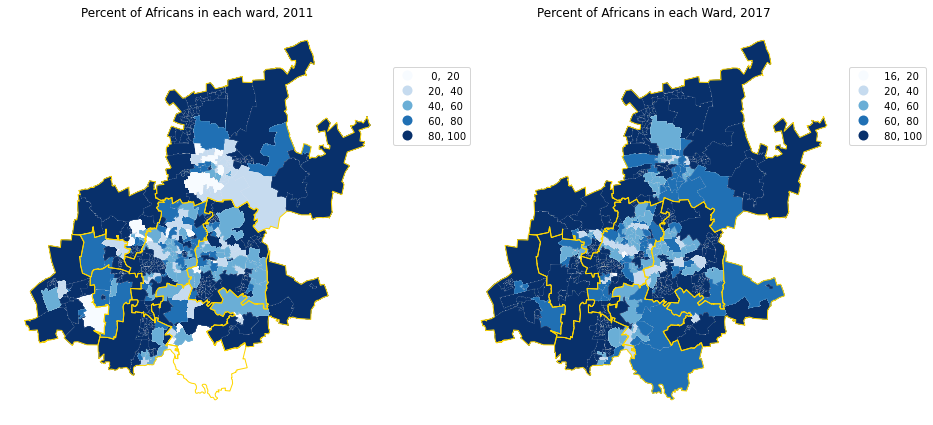

In [21]:
# create the 1x2 subplots
# set sharex and sharey to true to scale each map equally
fig, axs = plt.subplots(1, 2, figsize=(15, 12), sharex=True, sharey=True)

# name each subplot
ax1, ax2 = axs

# 2011 on the left
base = qol_2011.plot(column='Percent African',
                 legend=True,
                 scheme='user_defined',
                     classification_kwds={'bins':[20,40,60,80,100]},
                     legend_kwds={'fmt':'{:.0f}', 'loc':'upper left','bbox_to_anchor':(1,.9)},
              cmap='Blues', edgecolor='white', linewidth=0.05,
                    zorder=1,
                    ax=ax1)

local_munic_11.plot(ax=base,
               facecolor="none",
                   column='LocalMunicipalityName',
                   edgecolor='gold',
                   linewidth=1.0,
                   legend=False,
               zorder=1)

ax1.axis("off")
ax1.set_title('Percent of Africans in each ward, 2011')

# 2017 on the right
base = qol_2017.plot(column='Percent African',
                 legend=True,
                 scheme='user_defined',
                     classification_kwds={'bins':[20,40,60,80,100]},
                     legend_kwds={'fmt':'{:.0f}', 'loc':'upper left','bbox_to_anchor':(1,.9)},
              cmap='Blues', edgecolor='white', linewidth=0.05,
                    zorder=1,
                    ax=ax2)

local_munic_17.plot(ax=base,
               facecolor="none",
                   column='LocalMunicipalityName',
                   edgecolor='gold',
                   linewidth=1.0,
                   legend=False,
               zorder=2
                  )
ax2.axis("off")
ax2.set_title('Percent of Africans in each Ward, 2017')

By plotting the data side by side, we can see that the wards have changed between 2011 and 2017 and the percentage of respondents that identify as African has increased throughout the region but especially in wards on the outskirts of Gauteng

My notebook is running out of memory so for the rest of the data we'd like to include, I will be creating a separate notebook